In [12]:
# Dependencies
import json
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from datetime import datetime
from pprint import pprint

In [13]:
# Import Twitter API Keys
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [14]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [15]:
# Target Hashtags
target_user =["@BBC", "@CBSNews", "@cnni", "@FoxNews", "@nytimes"]

In [16]:
# List for dictionaries of results
user_results_means_list= []
user_result_list = []
bbc_results = []

In [17]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [18]:
public_tweets = api.user_timeline("@BBC", page=1)
pprint(public_tweets[1]["user"]["created_at"])

'Thu Jan 29 08:30:16 +0000 2009'


In [19]:
# Loop through each user
for user in target_user:

    # Variables for holding sentiments
    tweet_text_list = []
    tweet_times = []
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    
    # Loop through 10 pages of tweets (total 200 tweets)
    for x in range(1, 6):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x)

        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            tweet_text = tweet["text"]
            tweet_time = tweet["user"]["created_at"]
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
           # Add each value to the appropriate list
            tweet_text_list.append(tweet_text)
            tweet_times.append(tweet_time)
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)

    # Create a dictionaty of results
    user_results_means = {
        "Compound Score": np.mean(compound_list),
        "Postive Score": np.mean(positive_list),
        "Neutral Score": np.mean(neutral_list),
        "Negative Score": np.mean(negative_list)
        }
    user_results = {
        "Text" : tweet_text_list,
        "Tweet Time" : tweet_times,
        "Compound Score": compound_list,
        "Postive Score": positive_list,
        "Neutral Score": neutral_list,
        "Negative Score": negative_list
        }
        
    # Append dictionary to list
    
    user_results_means_list.append(user_results_means)
    if user == "@BBC":
        bbc_df = pd.DataFrame(user_results)
    elif user == "@CBSNews":
       cbs_df = pd.DataFrame(user_results)
    elif user == "@cnni":
       cnn_df = pd.DataFrame(user_results)
    elif user == "@FoxNews":
       fox_df = pd.DataFrame(user_results)
    elif user == "@nytimes":
       nyt_df = pd.DataFrame(user_results)

In [20]:
nyt_df.head()

,Compound Score,Negative Score,Neutral Score,Postive Score,Text,Tweet Time
0,0.0000,0.000,1.000,0.000,Take extra caution with obscure tech brands. T...,Fri Mar 02 20:41:42 +0000 2007
1,0.0000,0.000,1.000,0.000,Neither a traditional tutor nor a straight-up ...,Fri Mar 02 20:41:42 +0000 2007
2,0.0000,0.000,1.000,0.000,‘Big Brother’ in India Requires Fingerprint Sc...,Fri Mar 02 20:41:42 +0000 2007
3,-0.6908,0.207,0.793,0.000,The tiny elevator in a Brooklyn housing projec...,Fri Mar 02 20:41:42 +0000 2007
4,0.6597,0.000,0.769,0.231,"""My parents don’t want to just throw money aro...",Fri Mar 02 20:41:42 +0000 2007


In [21]:
bbc_df["Timestamp"] = range(1, 101)
cbs_df["Timestamp"] = range(1, 101)
cnn_df["Timestamp"] = range(1, 101)
fox_df["Timestamp"] = range(1, 101)
nyt_df["Timestamp"] = range(1, 101)

In [43]:
organized_bbc_df = bbc_df[["Timestamp","Tweet Time","Text","Compound Score","Neutral Score","Negative Score","Postive Score"]]

organized_cbs_df = cbs_df[["Timestamp","Tweet Time","Text","Compound Score","Neutral Score","Negative Score","Postive Score"]]

organized_cnn_df = cnn_df[["Timestamp","Tweet Time","Text","Compound Score","Neutral Score","Negative Score","Postive Score"]]

organized_fox_df = fox_df[["Timestamp","Tweet Time","Text","Compound Score","Neutral Score","Negative Score","Postive Score"]]

organized_nyt_df = nyt_df[["Timestamp","Tweet Time","Text","Compound Score","Neutral Score","Negative Score","Postive Score"]]


In [45]:
compound_values_df = pd.DataFrame(organized_bbc_df["Timestamp"])
compound_values_df["bbc_compound"] = organized_bbc_df["Compound Score"]
compound_values_df["cbs_compound"] = organized_cbs_df["Compound Score"]
compound_values_df["cnn_compound"] = organized_cnn_df["Compound Score"]
compound_values_df["fox_compound"] = organized_fox_df["Compound Score"]
compound_values_df["nyt_compound"] = organized_nyt_df["Compound Score"]
#compound_values_df["Timestamp"] = organized_bbc_df["Timestamp"]
compound_values_df.head()

,Timestamp,bbc_compound,cbs_compound,cnn_compound,fox_compound,nyt_compound
0,1,0.5719,0.7351,0.5994,0.0000,0.0000
1,2,0.0000,0.0000,0.0000,0.0000,0.0000
2,3,-0.7269,0.4939,0.0000,0.0000,0.0000
3,4,0.6515,-0.8779,0.0000,-0.1027,-0.6908
4,5,0.6908,0.0000,0.2023,0.4767,0.6597


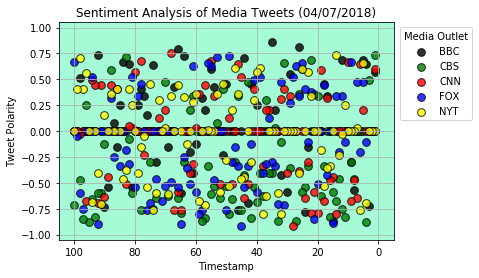

In [86]:
ax = compound_values_df.plot(kind="scatter", x="Timestamp",y="bbc_compound", color="black", edgecolors="black", s=60,  alpha=0.80, label="BBC")
compound_values_df.plot(kind="scatter", x="Timestamp",y="cbs_compound", color="green", edgecolors="black",s=60, alpha=0.80, label="CBS", ax=ax)
compound_values_df.plot(kind="scatter", x="Timestamp",y="cnn_compound", color="red", edgecolors="black",s=60, alpha=0.80,label="CNN", ax=ax)
compound_values_df.plot(kind="scatter", x="Timestamp",y="fox_compound", color="blue", edgecolors="black",s=60, alpha=0.80,label="FOX", ax=ax)
compound_values_df.plot(kind="scatter", x="Timestamp",y="nyt_compound", color="yellow", edgecolors="black",s=60, alpha=0.80, label="NYT", ax=ax)
plt.title("Sentiment Analysis of Media Tweets (04/07/2018)")
plt.ylabel("Tweet Polarity")
ax.set_facecolor('xkcd:pale turquoise')
#Putting Legend
plt.legend(title = "Media Outlet", loc="upper right",bbox_to_anchor=(1.25, 1))
plt.xlim([105,-5]) #Bonus
plt.ylim([-1.05,1.05]) #Bonus
plt.grid()
plt.show()

In [93]:
overall_sentiments_df = pd.DataFrame(user_results_means_list)
overall_sentiments_df["Media Outlet"] = target_user
overall_sentiments_df


,Compound Score,Negative Score,Neutral Score,Postive Score,Media Outlet
0,0.066364,0.05061,0.87001,0.07936,@BBC
1,-0.249792,0.15552,0.80227,0.04221,@CBSNews
2,-0.048911,0.08041,0.85507,0.06451,@cnni
3,-0.091487,0.12067,0.80090,0.07841,@FoxNews
4,-0.033490,0.09083,0.83704,0.07216,@nytimes


AttributeError: Unknown property gap

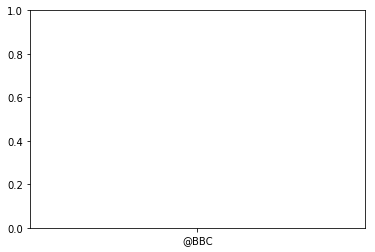

In [167]:
bar_chart = plt.bar(overall_sentiments_df["Media Outlet"],overall_sentiments_df["Compound Score"], 
                    color ='brown', alpha=0.5, align="edge")
x_axis = np.arange(len(overall_sentiments_df["Media Outlet"]))
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["BBC", "CBS", "CNN", "FOX", "NYT"])

plt.title("Overall Media Sentiment Based on Tweeter (04/07/2018)")
plt.ylabel("Tweet Polarity")
bar_chart[1].set_color('green')
bar_chart[2].set_color('red')
bar_chart[3].set_color('blue')
bar_chart[4].set_color('yellow')

plt.ylim([-0.3,0.15]) #Bonus
plt.grid()
plt.show()